## Data Understanding

### Import Libraries

In [1]:
# Import library yang dibutuhkan
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path

%matplotlib inline
warnings.filterwarnings("ignore")
sns.set()

Selanjutnya memanggil dataset dengan format csv



#### Load Data

In [2]:
# menyimpan masing-masing file ke dalam variabel dataframe
eco_place = 'https://raw.githubusercontent.com/rasyidperkim/dicoding-ml-terapan/main/dataset/eco_place.csv'
eco_rating = 'https://raw.githubusercontent.com/rasyidperkim/dicoding-ml-terapan/main/dataset/eco_rating.csv'

# menjadikan file csv sebagai dataframe
df_place = pd.read_csv(eco_place)
df_rating = pd.read_csv(eco_rating)

Dalam proyek Rekomendasi *Ecotourism* ini, kita memiliki 2 file terpisah mengenai tempat wisata dan rating dari user.

File eco_place.csv berisi data tentang berbagai tempat wisata alam dan rating. Setiap baris dalam dataset mewakili satu tempat wisata ekologis dengan detail sebagai berikut:

0. `place_id`: ID unik untuk setiap tempat.
1. `place_name`: Nama tempat wisata.
2. `place_description`: Deskripsi singkat tentang tempat wisata.
3. `category`: Kategori tempat wisata (misalnya, "Budaya,Taman Nasional", "Desa Wisata", dll.).
4. `city`: Kota atau Provinsi dari wisata tersebut berada.
5. `price`: Harga tiket masuk ke tempat wisata.
6. `rating`: Peringkat tempat wisata tersebut.
7. `description_location`: Deskripsi lokasi tempat wisata tersebut.
8. `place_img`: URL gambar tempat tersebut.
9. `gallery_photo_img1`, `gallery_photo_img2`, `gallery_photo_img3`: URL gambar lainnya dari tempat tersebut.
10. `place_map`: URL peta tempat tersebut.


File eco_rating.csv berisi data tentang rating dan user dengan detail sebagai berikut :
0. `user_id` : angka unik atau ID user yang memberikan rating
1. `place_id` : kode nama tempat wisata ekologis
2. `user_rating` : nilai rating yang diberikan user

### Data Overview

Berikut adalah sampel 5 data teratas dari dataframe df_place

In [3]:
# menampilkan 5 data teratas untuk dataframe place
df_place.head()

,place_id,place_name,place_description,category,city,price,rating,description_location,place_img,gallery_photo_img1,gallery_photo_img2,gallery_photo_img3,place_map
0,1,Taman Nasional Gunung Leuser,Taman Nasional Gunung Leuser adalah salah satu...,"Budaya,Taman Nasional",Aceh,"Rp25,000",4.5,"Barisan mountain range, Aceh 24653",https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://www.google.com/maps/search/Taman+Nasio...
1,2,Desa Wisata Munduk,Desa Wisata Munduk adalah sebuah desa di pegun...,Desa Wisata,Bali,"Rp10,000",4.5,"Munduk, Banjar, Kabupaten Buleleng, Bali",https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://goo.gl/maps/LyeJ2mAeFGysTE9v9
2,3,Desa Wisata Penglipuran,Desa Wisata Penglipuran adalah sebuah desa wis...,"Budaya,Desa Wisata",Bali,"Rp25,000",4.8,"Jl. Penglipuran, Kubu, Kec. Bangli, Kabupaten ...",https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://www.google.com/maps/search/Desa+Wisata...
3,4,Taman Nasional Bali Barat,Taman Nasional Bali Barat adalah kawasan konse...,"Taman Nasional,Cagar Alam",Bali,"Rp15,000",4.5,"Sumber Klampok, Bali",https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://www.google.com/maps/search/Taman+Nasio...
4,5,Bukit Jamur,Bukit Jamur Ciwidey adalah satu dari sekian ba...,Cagar Alam,Bandung,"Rp12,000",4.2,"Sugihmukti, Kec. Pasirjambu, Kabupaten Bandung...",https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://www.google.com/maps/search/Bukit+Jamur


In [4]:
# menampilkan 5 data teratas untuk dataframe rating
df_rating.head()

,user_id,place_id,user_rating
0,1,28,2
1,1,86,4
2,1,94,4
3,1,146,3
4,2,17,2


In [5]:
df_rating[df_rating['user_id'] == 47]

,user_id,place_id,user_rating
244,47,24,4
245,47,26,4
246,47,113,4
247,47,144,4
248,47,159,3
249,47,168,5
250,47,172,4


Selanjutnya dilakukan Exploratory Data Analysis.

## Exploratory Data Analysis (EDA)

Pada tahapan ini data akan melalui proses Exploratory Data Analysis (EDA). Bertujuan untuk mendapatkan insight data.

### 1.1 Proses EDA pada datafame Place

#### 1.1.1. Pengecekan tipe data pada setiap kolom.

In [6]:
#Melihat informasi data mulai dari jumlah data, tipe data, memory yang digunakan dll.
df_place.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   place_id              182 non-null    int64  
 1   place_name            182 non-null    object 
 2   place_description     182 non-null    object 
 3   category              182 non-null    object 
 4   city                  182 non-null    object 
 5   price                 182 non-null    object 
 6   rating                182 non-null    float64
 7   description_location  182 non-null    object 
 8   place_img             182 non-null    object 
 9   gallery_photo_img1    182 non-null    object 
 10  gallery_photo_img2    180 non-null    object 
 11  gallery_photo_img3    105 non-null    object 
 12  place_map             182 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 18.6+ KB


Dari informasi ini dapat diringkaskan :
1. Ada 182 data, dengan 1 fitur bertipe data float, 1 fitur bertipe data betipe integer, dan 11 data bertipe objek.
2. Dari tipe data sudah benar kecuali untuk fitur **price** harusnya memiliki tipe data integer. Hal ini karena berisi teks 'Rp' di depan angka dan kata 'Gratis' sehingga dibaca sebagai objek.
3. Variabel yang relevan dijadikan dalam sistem rekomendasi adalah **place_name** , **category**, dan **rating**

In [7]:
#Mengubah tipe data price dari string menjadi integer
df_place['price'] = df_place['price'].replace('Gratis', '0').str.replace('Rp', '').str.replace(',', '').astype(int)

#### 1.1.2. Menampilkan informasi deskriptif pada setiap kolom numerik

In [8]:
# Deskripsikan data numerik
df_place.describe()

,place_id,price,rating
count,182.000000,182.000000,182.000000
mean,91.500000,28060.439560,4.424725
std,52.683014,84926.872514,0.224700
min,1.000000,0.000000,3.400000
25%,46.250000,5000.000000,4.300000
50%,91.500000,10000.000000,4.400000
75%,136.750000,20000.000000,4.600000
max,182.000000,900000.000000,5.000000


Dari informasi ini dapat diringkaskan :

**rating:**
1. Nilai rata-rata adalah 4.42, dengan nilai minimum 3.4 dan maksimum 5.
2. Nilai tengah (median) adalah 4.4, dan sebagian besar nilai berada di antara 4.3 dan 4.6 (kuartil pertama dan ketiga).
3. Standar deviasi sebesar 0.22 menunjukkan bahwa nilai rating cenderung berdekatan dengan rata-rata.

**price**:
1. Harga masuk objek wisata berbasis ekologis dari gratis hingga yang tertinggi mencapai Rp. 900.000, dengan rata-rata Rp. 28,060.44
2.  Nilai tengah (median) adalah Rp. 10.000, dan sebagian besar nilai berada di antara Rp. 5.000 dan Rp.20.000 (kuartil pertama dan ketiga).
3. Standar deviasi sebesar Rp. 84,926.87 menunjukkan bahwa terdapat variasi yang cukup besar dalam harga tiket masuk. Ada beberapa tempat dengan harga tiket masuk yang jauh lebih tinggi dari rata-rata, yang mungkin meningkatkan standar deviasi.

#### 1.1.3. Menampilkan jumlah data unik dari setiap kolom

In [9]:
# Tampilkan jumlah data unik setiap kolom
print(df_place.nunique())

place_id                182
place_name              182
place_description       182
category                 20
city                     47
price                    31
rating                   12
description_location    180
place_img               182
gallery_photo_img1      182
gallery_photo_img2      180
gallery_photo_img3      105
place_map               182
dtype: int64


Dari informasi ini dapat diringkaskan :
1. Ada 20 kategori jenis *ecotourism* pada dataset ini
2. Ada 47 kota dari lokasi *ecotourism* pada dataset ini

#### 1.1.4. Analisis Univariat

In [10]:
#Tampilkan detail data kategori
print('Jumlah kategori: \n')
print(df_place['category'].value_counts())

Jumlah kategori: 

Cagar Alam                                        41
Budaya,Cagar Alam                                 35
Bahari,Cagar Alam                                 29
Cagar Alam,Taman Nasional                         18
Cagar Alam,Taman Hiburan                          12
Taman Hiburan                                      7
Budaya                                             6
Desa Wisata                                        6
Taman Nasional,Cagar Alam                          5
Budaya,Taman Hiburan                               4
Desa Wisata,Taman Hiburan                          3
Budaya,Taman Nasional                              3
Budaya,Cagar Alam,Taman Nasional                   2
Bahari,Taman Hiburan                               2
Cagar Alam,Desa Wisata                             2
Bahari,Taman Hiburan,Taman Nasional                2
Budaya,Desa Wisata                                 2
Bahari,Cagar Alam,Taman Hiburan,Taman Nasional     1
Taman Nasional             

Untuk variabel `category`, terlebih dahulu harus dilakukan pemisahan kategori yang dituliskan bersama dalam satu baris menjadi kategori yang terpisah. Misalnya, baris dengan kategori "Budaya,Taman Nasional" akan dipisahkan menjadi dua baris: satu dengan kategori "Budaya" dan satu lagi dengan kategori "Taman Nasional". Hal ini akan memungkinkan penghitungan frekuensi yang lebih akurat untuk setiap kategori.

In [11]:
category_freq = df_place['category'].str.split(',', expand=True).stack()

Setelah itu dapat dilakukan perhitungan frekuensi data kategori dan kota

In [12]:
#Tampilkan detail data kategori
print('Jumlah kategori: \n')
print(category_freq.value_counts())
print('--------------------------------------------------------')
print('Jumlah kota: \n')
print(df_place['city'].value_counts())

Jumlah kategori: 

Cagar Alam        146
Budaya             53
Bahari             34
Taman Nasional     32
Taman Hiburan      31
Desa Wisata        14
dtype: int64
--------------------------------------------------------
Jumlah kota: 

Yogyakarta          53
Bandung             36
Semarang            17
Jakarta             12
Bogor                7
Malang               5
Jambi                3
Surabaya             3
Bali                 3
Sukabumi             2
Manggarai            2
Lampung              2
Kulon Progo          2
Lombok               2
Jember               1
Pekanbaru            1
Wonosobo             1
Banten               1
Sumatra Utara        1
Bantul               1
Subang               1
Solok Selatan        1
Sleman               1
Situbondo            1
Banyuwangi           1
Samarinda            1
Purwakarta           1
Pontianak            1
Pesawaran            1
Pelalawan            1
Papua Barat          1
Jepara               1
Palembang            1
Padan

Dari output ini didapatkan informasi :
**Category**
1. Terdapat 6 kategori untuk ecotourism pada dataset ini.
2. Kategori "Cagar Alam" memiliki jumlah tempat wisata ekologis terbanyak (146 tempat), diikuti oleh "Budaya" (53 tempat), dan "Bahari" (34 tempat).
3. Kategori "Desa Wisata" memiliki jumlah tempat wisata ekologis paling sedikit (14 tempat) di antara semua kategori.

**City**
1. Yogyakarta memiliki jumlah tempat wisata ekologis terbanyak (53 tempat), diikuti oleh Bandung (36 tempat), dan Semarang (17 tempat).
2. Sejumlah kota hanya memiliki satu tempat wisata ekologis, seperti Jember, Pekanbaru, Wonosobo, Banten, dan lainnya.

#### 1.1.5 Analisis Multivariat

Pada tahap ini akan dilakukan visualisasi untuk menganalisa hubungan antara kota dengan rating, kota dengan harga, rating dengan harga, dan rating dengan kategori. Untuk kota dijadikan 5 kategori saja yaitu kota selain Yogyakarta, Bandung, Semarang, dan Jakarta diberi label 'Lainnya'



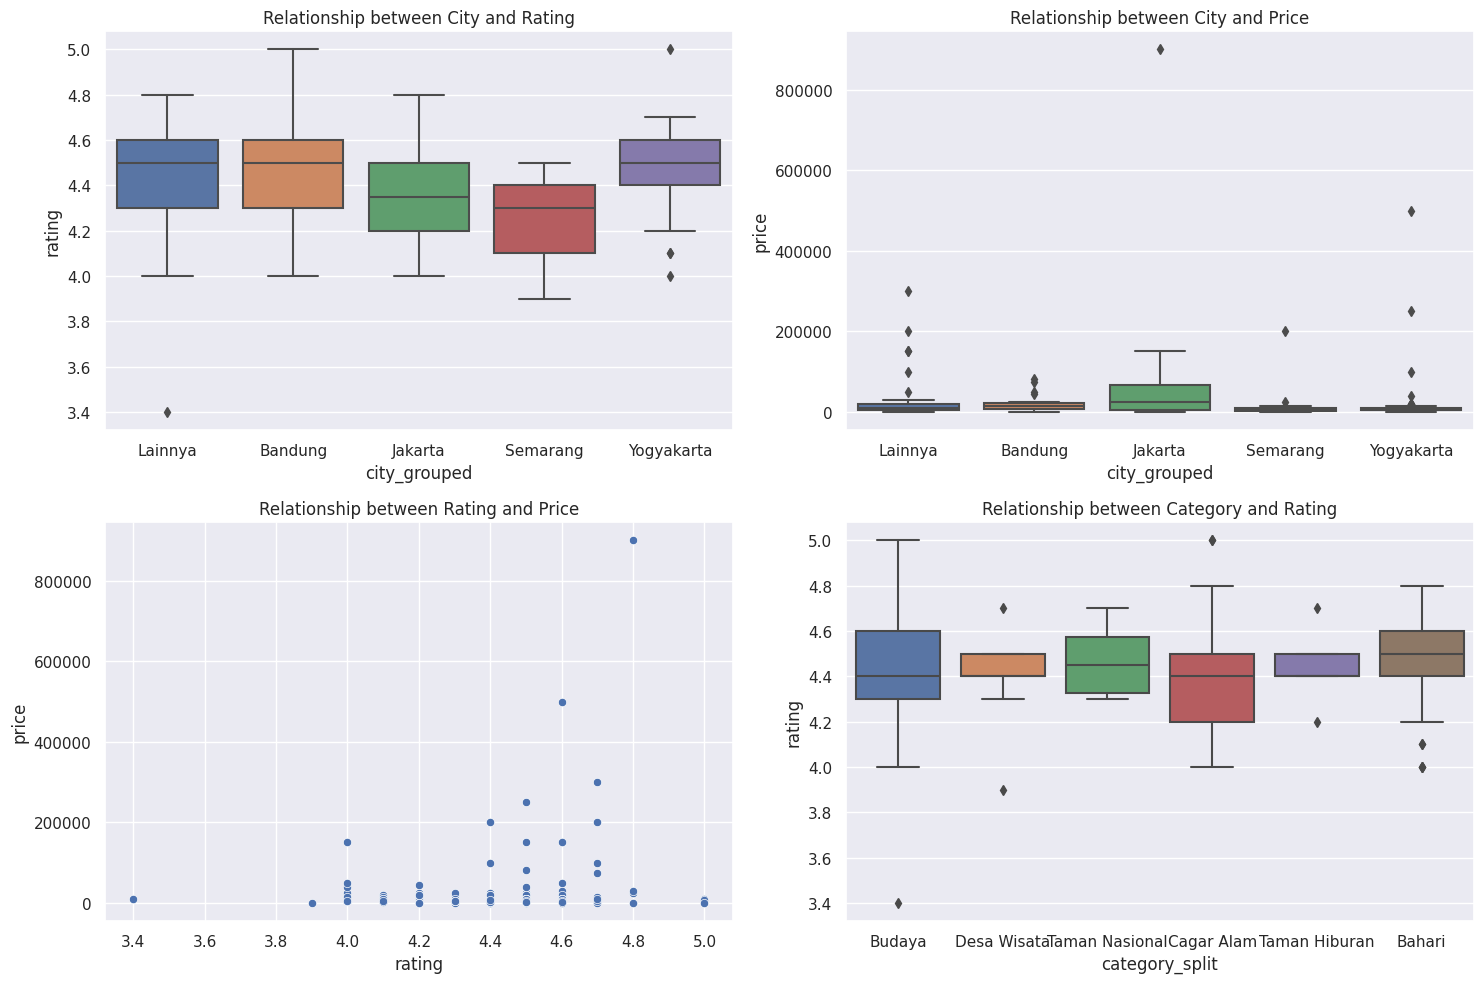

In [13]:
# Gabung semua kota lainnya kecuali Yogyakarta, Bandung, Semarang, dan Jakarta
df_place['city_grouped'] = df_place['city'].where(df_place['city'].isin(['Yogyakarta', 'Bandung', 'Semarang', 'Jakarta']), 'Lainnya')

# Buat subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# 1. hubungan antara kota dengan rating
sns.boxplot(x='city_grouped', y='rating', data=df_place, ax=ax[0, 0])
ax[0, 0].set_title('Relationship between City and Rating')

# 2. hubungan antara kota dengan harga
sns.boxplot(x='city_grouped', y='price', data=df_place, ax=ax[0, 1])
ax[0, 1].set_title('Relationship between City and Price')

# 3. hubungan antara rating dengan harga
sns.scatterplot(x='rating', y='price', data=df_place, ax=ax[1, 0])
ax[1, 0].set_title('Relationship between Rating and Price')

# 4.hubungan antara rating dengan kategori
df_place['category_split'] = df_place['category'].str.split(',', expand=True)[0]
sns.boxplot(x='category_split', y='rating', data=df_place, ax=ax[1, 1])
ax[1, 1].set_title('Relationship between Category and Rating')

# tampilkan plot
plt.tight_layout()
plt.show()

Dari visualisasi data, berikut beberapa insight yang didapatkan:

1. Hubungan antara Kota dan Rating:
* Yogyakarta, Bandung, Semarang, Jakarta, dan kota-kota lainnya memiliki variasi rating yang cukup mirip, dengan median rating sekitar 4.2 hingga 4.6.
* Sejumlah tempat wisata di Yogyakarta dan Bandung memiliki rating yang lebih rendah (sekitar 4), dan beberapa tempat di Bandung memiliki rating yang lebih tinggi (5).

2. Hubungan antara Kota dan Harga:

* Yogyakarta, Bandung, dan kota-kota lainnya memiliki variasi harga tiket masuk yang cukup mirip, dengan harga sebagian besar tempat wisata berada di bawah 50,000.
* Jakarta memiliki variasi harga yang lebih besar, dengan beberapa tempat wisata memiliki harga tiket masuk yang sangat tinggi (hingga 900,000).
* Beberapa tempat wisata di Semarang juga memiliki harga tiket masuk yang relatif tinggi (hingga sekitar 200,000).

3. Hubungan antara Rating dan Harga:

* Tidak ada pola yang jelas antara rating dan harga. Sebagian besar tempat wisata, baik yang memiliki rating tinggi maupun rendah, memiliki harga tiket masuk di bawah 200,000. Hanya ada beberapa tempat dengan harga yang sangat tinggi, dan rating mereka bervariasi.

4. Hubungan antara Kategori dan Rating:

* Tempat wisata dalam kategori "Budaya" dan "Cagar Alam" memiliki variasi rating yang cukup mirip, dengan median rating sekitar 4.4 hingga 4.5. Sejumlah tempat dalam kategori ini memiliki rating yang lebih rendah (sekitar 3.5), dan beberapa tempat memiliki rating yang lebih tinggi (5).
* Tempat wisata dalam kategori "Taman Nasional" cenderung memiliki rating yang lebih tinggi, dengan sebagian besar rating di atas 4.
* Tempat wisata dalam kategori "Desa Wisata" memiliki variasi rating yang lebih besar, dengan beberapa tempat memiliki rating yang lebih rendah (sekitar 3.9) dan beberapa tempat memiliki rating yang lebih tinggi (4.7).

### 1.2 Proses EDA pada datafame Rating

#### 1.2.1 Pengecekan tipe data pada setiap kolom.

In [14]:
#Melihat informasi data mulai dari jumlah data, tipe data, memory yang digunakan dll.
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849 entries, 0 to 848
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   user_id      849 non-null    int64
 1   place_id     849 non-null    int64
 2   user_rating  849 non-null    int64
dtypes: int64(3)
memory usage: 20.0 KB


Dari informasi ini dapat dilihat ada kesamaan kolom place_id pada dataframe place. Tipe data sudah sesuai semua sehingga tidak perlu ada yang kita konversi

#### 1.2.2 Menampilkan informasi deskriptif pada setiap kolom numerik

In [15]:
df_rating.describe()

,user_id,place_id,user_rating
count,849.000000,849.000000,849.000000
mean,77.792697,89.064782,3.507656
std,44.226709,53.242054,0.948062
min,1.000000,2.000000,2.000000
25%,41.000000,43.000000,3.000000
50%,77.000000,87.000000,4.000000
75%,115.000000,134.000000,4.000000
max,156.000000,183.000000,5.000000


Berdasarkan output ini dapat dilihat informasi sebagai berikut :
1. data user_id berjumlah 849 sedangkan nilai maksimal pada data ini 156. Dengan demikian ada user_id yang memberikan rating pada lokasi yang berbeda-beda.
2. Terdapat kesamaan nama kolom place_id pada dataframe place. Hanya saja pada place_id dengan angka 1 pada dataframe place tidak ada pada data ini karena angka minimal adalah 2. Sebaliknya place_id dengan angka 183, tidak ada pada dataframe place.
3. Nilai rata-rata user_rating adalah 3.51, dengan nilai minimum 2 dan maksimum 5. Standar deviasi sebesar 0.95 menunjukkan bahwa terdapat variasi dalam peringkat yang diberikan oleh pengguna. Pada dataframe place, rating paling rendah adalah 3.4 dan tidak ada yang bernilai 2

#### 1.2.3 Analisis Univariat

In [16]:
# menampilkan informasi seputar rating oleh user
print('Jumlah user yang memberi review: ', len(df_rating.user_id.unique()))
print('Jumlah tempat yang diberi review: ', len(df_rating.place_id.unique()))
print('Jumlah rating yang berbeda: ', len(df_rating.user_rating.unique()))
print('Rata-rata jumlah rating di suatu tempat:', df_rating['place_id'].value_counts().median())
print('Jumlah rating terbanyak di suatu tempat:', max(df_rating['place_id'].value_counts().values))
print('Jumlah rating terbanyak oleh 1 user:', max(df_rating['user_id'].value_counts().values))
print('Jumlah rating tersedikit oleh 1 user:', min(df_rating['user_id'].value_counts().values))
print('Rata-rata jumlah rating oleh 1 user:', df_rating['user_id'].value_counts().median())

Jumlah user yang memberi review:  156
Jumlah tempat yang diberi review:  182
Jumlah rating yang berbeda:  4
Rata-rata jumlah rating di suatu tempat: 5.0
Jumlah rating terbanyak di suatu tempat: 10
Jumlah rating terbanyak oleh 1 user: 7
Jumlah rating tersedikit oleh 1 user: 4
Rata-rata jumlah rating oleh 1 user: 5.0


### Data Preprocessing

In [17]:
# Menggabungkan data tempat dan rating pengguna
data = df_place.merge(df_rating, on='place_id', how='left')

## Data Preparation

#### Missing Value and Data Duplicate Treatment

Penanganan data null atau duplikat pada data place. Tahap ini bertujuan untuk membersihkan data sebelum menjadi model Content Based Filtering dan Collaborative Filtering, untuk mereduksi kesalahan rekomendasi

In [18]:
# Periksa missing values pada dataframe
data.isnull().sum()

place_id                  0
place_name                0
place_description         0
category                  0
city                      0
price                     0
rating                    0
description_location      0
place_img                 0
gallery_photo_img1        0
gallery_photo_img2        7
gallery_photo_img3      357
place_map                 0
city_grouped              0
category_split            0
user_id                   1
user_rating               1
dtype: int64

Pada `gallery_photo_img3` dan `gallery_photo_img2` banyak terdapat *missing values* yang berarti tidak semua data tempat memiliki foto lebih dari satu. Hanya saja kedua feature ini diabaikan karena tidak relevan sebagai bagian dari model. Sedangkan data null pada `user_id` harus dihapus. Proses ini bertujuan untuk mengantisipasi permasalahan karena tidak adanya data user yang memberi rating pada model Collaborative Filtering.

In [19]:
# Hapus baris dengan data user_id null
data = data.dropna(subset=['user_id'])

In [20]:
# Periksa jika ada data duplikat pada dataframe
print(f'Jumlah Data Duplikat: {df_rating.duplicated().sum()}')

Jumlah Data Duplikat: 3


Dengan adanya 3 data duplikat pada df_rating, maka kita hapus data duplikasi tersebut

In [21]:
# hapus data duplikat
data.drop_duplicates(keep='first', inplace=True)

# Periksa data duplikat pada dataframe rating
print(f'Jumlah Data Duplikat: {data.duplicated().sum()}')

Jumlah Data Duplikat: 0


### Feature Engineering

Melakukan pemrosesan data yang diperlukan seperti menghapus kolom yang tidak diperlukan, dan mengubah format data jika diperlukan.

In [22]:
# Hapus kolom yang tidak diperlukan
data = data.drop(['place_description', 'price', 'city', 'description_location', 'place_img', 	'gallery_photo_img1', 'gallery_photo_img2',	'gallery_photo_img3', 'place_map', 'city_grouped', 'category_split'], axis=1)

#Memeriksa informasi data hasil gabungan
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 1 to 846
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   place_id     843 non-null    int64  
 1   place_name   843 non-null    object 
 2   category     843 non-null    object 
 3   rating       843 non-null    float64
 4   user_id      843 non-null    float64
 5   user_rating  843 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 46.1+ KB


In [23]:
# Cetak jumlah unik pengguna dan ekowisata
num_users = data.user_id.nunique()
num_places = data.place_id.nunique()

print("Jumlah Pengguna:", num_users)
print("Jumlah Ekowisata:", num_places)

Jumlah Pengguna: 156
Jumlah Ekowisata: 181


In [24]:
# Membuat dataframe baru 'eco_tour' dengan data yang sama seperti 'data'
eco_tour = data.copy()

# Menghapus data duplikat berdasarkan kolom 'place_id' dan menyimpan hasilnya di 'eco_tour'
eco_tour.drop_duplicates(subset='place_id', keep='first', inplace=True)

# Memeriksa hasil penghapusan duplikat
eco_tour

,place_id,place_name,category,rating,user_id,user_rating
1,2,Desa Wisata Munduk,Desa Wisata,4.5,46.0,5.0
6,3,Desa Wisata Penglipuran,"Budaya,Desa Wisata",4.8,15.0,3.0
11,4,Taman Nasional Bali Barat,"Taman Nasional,Cagar Alam",4.5,65.0,3.0
12,5,Bukit Jamur,Cagar Alam,4.2,4.0,2.0
17,6,Bukit Moko,Cagar Alam,4.5,45.0,3.0
...,...,...,...,...,...,...
819,178,Studio Alam Gamplong,Taman Hiburan,4.4,2.0,4.0
828,179,Watu Goyang,"Budaya,Cagar Alam",4.4,36.0,2.0
835,180,Watu Lumbung,Cagar Alam,4.3,63.0,3.0
837,181,Wisata Alam Kalibiru,"Budaya,Cagar Alam",4.4,19.0,4.0


Standarisasi kolom `category`: Proses ini perlu dilakukan sebelum melakukan vektorisasi teks agar format setiap value pada `category` seragam. Proses yang dilakukan pada tahapan ini antara lain:
1. Menjadikan data pada `category` sebagai lowercase sebelum menggunakan vectorizer untuk menjaga konsistensi, normalisasi, dan reduksi dimensi dalam pemrosesan teks.
2. Mengubah tanda spasi pada `category` menjadi underscore agar menjadi sebuah kata yang terhubung. Tujuannya untuk menghindari terlalu banyak kategori berdasarkan jumlah kata yang dapat menyebabkan ambiguinitas.

In [25]:
# mengubah format teks menjadi lowercase
eco_tour['category'] = eco_tour['category'].apply(lambda x: x.lower())

# mengubah spasi antar kata menjadi underscore
eco_tour['category'] = eco_tour['category'].str.replace(' ', '_')

# nilai dalam kolom category diubah menjadi array yang berisi string
eco_tour['category'] = eco_tour['category'].str.split(',').astype(str)

# nilai dalam kolom category diubah menjadi array yang berisi string
eco_tour['category'] = eco_tour['category'].apply(lambda x: eval(x))

# Convert the list of categories into a space-separated string
eco_tour['category'] = eco_tour['category'].apply(lambda x: ' '.join(x))

# mengecek perubahan
print(eco_tour['category'].value_counts())

cagar_alam                                        41
budaya cagar_alam                                 35
bahari cagar_alam                                 29
cagar_alam taman_nasional                         18
cagar_alam taman_hiburan                          12
taman_hiburan                                      7
desa_wisata                                        6
budaya                                             6
taman_nasional cagar_alam                          5
budaya taman_hiburan                               4
desa_wisata taman_hiburan                          3
budaya desa_wisata                                 2
budaya cagar_alam taman_nasional                   2
bahari taman_hiburan                               2
cagar_alam desa_wisata                             2
bahari taman_hiburan taman_nasional                2
budaya taman_nasional                              2
bahari cagar_alam taman_hiburan taman_nasional     1
taman_nasional                                

Mengubah data ke dalam bentuk list pada kolom `place_id`, `place_name`, dan `category`. Bertujuan untuk pembuatan dataframe baru yang akan dijadikan sebagai data penerapan sistem rekomendasi.

In [26]:
# Mengonversi data series menjadi bentuk list
place_id = eco_tour['place_id'].tolist()
place_name = eco_tour['place_name'].tolist()
place_category = eco_tour['category'].tolist()

#### Data Preparation for Content-Based Filtering

Tahap berikutnya, pembuatan dictionary untuk menentukan pasangan key-value pada data place_id, place_name, dan place_category yang telah disiapkan sebelumnya.

In [27]:
# Membuat dictionary untuk list
data_new = pd.DataFrame({
    'id': place_id,
    'place_name': place_name,
    'category': place_category
})
data_new

,id,place_name,category
0,2,Desa Wisata Munduk,desa_wisata
1,3,Desa Wisata Penglipuran,budaya desa_wisata
2,4,Taman Nasional Bali Barat,taman_nasional cagar_alam
3,5,Bukit Jamur,cagar_alam
4,6,Bukit Moko,cagar_alam
...,...,...,...
176,178,Studio Alam Gamplong,taman_hiburan
177,179,Watu Goyang,budaya cagar_alam
178,180,Watu Lumbung,cagar_alam
179,181,Wisata Alam Kalibiru,budaya cagar_alam


#### **Data Preparation for Collaborative Filtering**

In [28]:
#menyalin dan membuat dataframe baru 'df'
df = data.copy()

# Mengubah user_id menjadi list tanpa nilai yang sama
user_ids = df['user_id'].unique().tolist()
print('list user id: ', user_ids)

# Melakukan encoding user_id
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded user id : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke user_id
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke user_id: ', user_encoded_to_user)

list user id:  [46.0, 75.0, 79.0, 94.0, 137.0, 15.0, 63.0, 102.0, 112.0, 127.0, 65.0, 4.0, 23.0, 74.0, 98.0, 103.0, 45.0, 39.0, 68.0, 80.0, 90.0, 152.0, 32.0, 33.0, 37.0, 38.0, 41.0, 61.0, 71.0, 76.0, 8.0, 64.0, 72.0, 77.0, 126.0, 22.0, 26.0, 16.0, 19.0, 34.0, 60.0, 97.0, 105.0, 48.0, 58.0, 78.0, 115.0, 133.0, 144.0, 145.0, 13.0, 24.0, 52.0, 89.0, 99.0, 146.0, 149.0, 11.0, 67.0, 82.0, 84.0, 86.0, 93.0, 136.0, 156.0, 132.0, 2.0, 6.0, 21.0, 55.0, 57.0, 95.0, 25.0, 53.0, 107.0, 147.0, 14.0, 30.0, 51.0, 120.0, 92.0, 81.0, 143.0, 42.0, 43.0, 47.0, 18.0, 121.0, 124.0, 36.0, 119.0, 118.0, 1.0, 59.0, 106.0, 104.0, 110.0, 50.0, 62.0, 96.0, 116.0, 142.0, 7.0, 40.0, 73.0, 122.0, 150.0, 129.0, 128.0, 56.0, 69.0, 70.0, 9.0, 154.0, 100.0, 83.0, 85.0, 135.0, 66.0, 10.0, 117.0, 148.0, 12.0, 91.0, 49.0, 54.0, 131.0, 141.0, 44.0, 88.0, 114.0, 138.0, 151.0, 87.0, 155.0, 5.0, 17.0, 31.0, 113.0, 111.0, 3.0, 139.0, 20.0, 130.0, 101.0, 28.0, 125.0, 123.0, 35.0, 153.0, 134.0, 27.0, 108.0, 140.0, 29.0, 109.0]


In [29]:
# Mengubah place_id menjadi list tanpa nilai yang sama
place_ids = df['place_id'].unique().tolist()

# Melakukan proses encoding place_id
place_to_place_encoded = {x: i for i, x in enumerate(place_ids)}

# Melakukan proses encoding angka ke place_id
place_encoded_to_place = {i: x for i, x in enumerate(place_ids)}

In [30]:
# Mapping user_id ke dataframe user
df['user'] = df['user_id'].map(user_to_user_encoded)

# Mapping place_id ke dataframe resto
df['place'] = df['place_id'].map(place_to_place_encoded)

In [31]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah tempat ekowisata
num_place = len(place_encoded_to_place)
print(num_place)

# Mengubah rating menjadi nilai float
df['rating'] = df['rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(df['rating'])

# Nilai maksimal rating
max_rating = max(df['rating'])

print('Number of User: {}, Number of place: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_place, min_rating, max_rating
))

156
181
Number of User: 156, Number of place: 181, Min Rating: 3.4000000953674316, Max Rating: 5.0


Tahap persiapan telah selesai. Hal yang telah dilakukan :
* Memahami data rating yang dimiliki.
* Menyandikan (encode) fitur `user` dan `place_id` ke dalam indeks integer.
* Memetakan `user_id` dan `place_id` ke dataframe yang berkaitan.
* Mengecek beberapa hal dalam data.

Train-Test Data Split

Pada tahap ini, dataset dibagi menjadi dua bagian, yaitu data training (train) dan data testing. Tahap ini bertujuan untuk mempersiapkan data ratings yang akan digunakan dalam pelatihan dan pengujian model Collaborative Filtering. Pembagian dataset dengan komposisi 70:30. 70 % untuk data train dan 30 % untuk data test. Untuk pertama data diacak terlebih dahulu agar random

In [32]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)

In [33]:
# Membuat variabel x untuk mencocokkan data user dan tempat ekowisata menjadi satu value
x = df[['user', 'place']].values

# Membuat variabel y untuk membuat rating dari hasil
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 70% data train dan 30% data validasi
train_indices = int(0.7 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

## Modeling and Result

### 1. Content Based Filtering

#### TF-IDF Vectorizer

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Membuat objek TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data category
tfidf_matrix = tf.fit_transform(data_new['category'])

# Mapping array dari fitur index integer ke fitur nama
tf_feat = tf.get_feature_names_out()

tf_feat

array(['bahari', 'budaya', 'cagar_alam', 'desa_wisata', 'taman_hiburan',
       'taman_nasional'], dtype=object)

In [35]:
# Membuat dataframe untuk melihat tf-idf matrix
df_tfidf = pd.DataFrame(tfidf_matrix.todense(), columns=tf_feat, index=data_new.place_name)

# Mengambil sampel 6 kolom secara acak dan 10 baris secara acak
sample_df = df_tfidf.sample(n=10, axis=0).sample(n=6, axis=0)

# Menampilkan hasil
sample_df.head()

,bahari,budaya,cagar_alam,desa_wisata,taman_hiburan,taman_nasional
place_name,,,,,,
Sendang Geulis Kahuripan,0.000000,0.878691,0.477391,0.0,0.000000,0.0
Sindu Kusuma Edupark (SKE),0.000000,0.000000,0.405181,0.0,0.914237,0.0
Pantai Ancol,0.695248,0.000000,0.000000,0.0,0.718770,0.0
Taman Hutan Raya Ir. H. Djuanda,0.000000,0.632103,0.000000,0.0,0.774884,0.0
Pantai Greweng,0.909116,0.000000,0.416543,0.0,0.000000,0.0


#### **Cosine Similarity**

In [36]:
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)

# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama ekowisata
cosine_sim_df = pd.DataFrame(cosine_sim, index=data_new['place_name'], columns=data_new['place_name'])

# Melihat similarity matrix pada setiap ekowisata
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

place_name,Pantai Baron,Sindu Kusuma Edupark (SKE),Danau Rawa Pening,Taman Wisata Alam Ranca Upas,Pantai Greweng
place_name,,,,,
Goa Cerme,0.198854,0.193430,0.477391,1.000000,0.198854
Gunung Manglayang,0.168775,0.164171,0.405181,0.193430,0.168775
Pantai Krakal,1.000000,0.168775,0.416543,0.198854,1.000000
Pantai Jungwok,1.000000,0.168775,0.416543,0.198854,1.000000
Wisata Alam Wana Wisata Penggaron,0.416543,0.405181,1.000000,0.477391,0.416543
Bukit Jamur,0.416543,0.405181,1.000000,0.477391,0.416543
Taman Wisata Alam Curug Cipendok,0.198854,0.193430,0.477391,1.000000,0.198854
Pantai Klayar,1.000000,0.168775,0.416543,0.198854,1.000000
Studio Alam Gamplong,0.000000,0.914237,0.000000,0.000000,0.000000


Vektor TF-IDF telah dihitung untuk setiap ekowisata. Dalam kasus ini, kita mendapatkan matriks dengan 181 baris (satu untuk setiap ekowisata) dan 6 kolom (satu untuk setiap kategori).

Sekarang dilakukan pembuatan fungsi yang dapat memberikan rekomendasi ekowisata berdasarkan kesamaan kategori. Untuk itu diperlukan pembuatan dua pemetaan: satu untuk memetakan nama ekowisata ke indeksnya, dan satu lagi untuk memetakan indeks ke kategori.

In [37]:
# Buat mapping dari nama ekowisata ke index
indices = pd.Series(data_new.index, index=data_new['place_name']).drop_duplicates()

# Fungsi yang menerima nama ekowisata untuk input dan menghasilkan ekowisata yang paling mirip sebagai output
def get_recommendations(place_name, similarity_data=cosine_sim_df, items=data_new[['place_name', 'category']], k=5):
    if place_name not in data_new['place_name'].values:
        return "Maaf data belum ada di database..."
    # Ambil index yang cocok dengan nama ekowisata
    idx = indices[place_name]

    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,place_name].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop place_name agar ekowisata yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(place_name, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [ ]:
data_new[data_new.place_name.isin(['Taman Nasional Bali Barat', 'Danau Toba', 'Desa Wisata Munduk'])]

,id,place_name,category
0,2,Desa Wisata Munduk,desa_wisata
2,4,Taman Nasional Bali Barat,taman_nasional cagar_alam
123,125,Danau Toba,budaya cagar_alam desa_wisata


Percobaan fungsi ini dengan memasukkan sebuah nama ekowisata sebagai input.

In [ ]:
# Uji coba rekomendasi 1
get_recommendations('Taman Nasional Bali Barat')

,place_name,category
0,Taman Nasional Bukit Tigapuluh,cagar_alam taman_nasional
1,Taman Hutan Raya Wan Abdul Rachman,cagar_alam taman_nasional
2,Kawah Rengganis Cibuni,cagar_alam taman_nasional
3,Taman Hutan Raya Sultan Syarif Hasyim,cagar_alam taman_nasional
4,Taman Nasional Tesso Nilo,cagar_alam taman_nasional


In [ ]:
# Uji coba rekomendasi 2
get_recommendations('Danau Toba')

,place_name,category
0,Desa Wisata Penglipuran,budaya desa_wisata
1,Desa Wisata Cinangneng,budaya desa_wisata
2,Desa Wisata Kampung Cai Ranca Upas,cagar_alam desa_wisata
3,Desa Wisata Ngadas,cagar_alam desa_wisata
4,Desa Wisata Nglinggo,desa_wisata


In [ ]:
# Uji coba rekomendasi 3
get_recommendations('Desa Wisata Munduk')

,place_name,category
0,Desa Wisata Lembah Harau,desa_wisata
1,Desa Wisata Nglanggeran,desa_wisata
2,Desa Wisata Kinahrejo,desa_wisata
3,Desa Wisata Mangunan,desa_wisata
4,Danau Toba,budaya cagar_alam desa_wisata


In [ ]:
# Uji coba rekomendasi 4 dengan data yang belum ada di dataframe
get_recommendations('Pulau Kembang')

'Maaf data belum ada di database...'

#### **Jaccard Similarity**

In [38]:
# Fungsi untuk menghitung Jaccard similarity antara 2 setlis
def jaccard_similarity(list1, list2):
    set1 = set(list1)
    set2 = set(list2)
    intersection = len(set1.intersection(set2))
    union = len(set1) + len(set2) - intersection
    return intersection / union if union != 0 else 0


# Pengujian Fungsi
jaccard_similarity(['desa_wisata'], ['budaya', 'desa_wisata'])


0.5

Fungsi kesamaan Jaccard telah berhasil dibuat dan diuji. Ia mengembalikan skor 0,5 untuk dua list ['desa_wisata'] dan ['budaya', 'desa_wisata'], yang sesuai dengan ekspektasi. Langkah selanjutnya adalah untuk menerapkan fungsi ini ke data untuk membuat sistem rekomendasi.

In [39]:
# Fungsi yang menerima nama ekowisata untuk input dan menghasilkan ekowisata yang paling mirip sebagai output
def recommend_places(place_name, data_new, top_n=5):
    if place_name not in data_new['place_name'].values:
        return "Maaf data belum ada di database..."

    place_categories = data_new[data_new['place_name'] == place_name]['category'].values[0]
    data_new['similarity_score'] = data_new['category'].apply(lambda x: jaccard_similarity(x, place_categories))

    # Pengecualian hasil output dengan input
    data_new = data_new[data_new['place_name'] != place_name]

    # Urutkan skor similarity score dan menampilkan top-n
    recommendations = data_new.sort_values(by='similarity_score', ascending=False).head(top_n)

    return recommendations[['place_name', 'category', 'similarity_score']]

In [ ]:
# Uji coba rekomendasi 1
recommend_places('Taman Nasional Bali Barat', data_new)

,place_name,category,similarity_score
119,Taman Nasional Kerinci Seblat,taman_nasional cagar_alam,1.0
66,Taman Nasional Berbak,cagar_alam taman_nasional,1.0
68,Taman Nasional Bukit Tigapuluh,cagar_alam taman_nasional,1.0
20,Kawah Rengganis Cibuni,cagar_alam taman_nasional,1.0
19,Kawah Putih,cagar_alam taman_nasional,1.0


In [ ]:
# Uji coba rekomendasi 2
recommend_places('Danau Toba', data_new)

,place_name,category,similarity_score
84,Desa Wisata Ngadas,cagar_alam desa_wisata,0.823529
12,Desa Wisata Kampung Cai Ranca Upas,cagar_alam desa_wisata,0.823529
39,Taman Nasional Ujung Kulon,budaya cagar_alam taman_nasional,0.789474
69,Taman Nasional Meru Betiri,budaya cagar_alam taman_nasional,0.789474
120,Taman Wisata Tirta Alam,budaya cagar_alam,0.705882


In [ ]:
# Uji coba rekomendasi 3
recommend_places('Desa Wisata Munduk', data_new)

,place_name,category,similarity_score
118,Desa Wisata Kinahrejo,desa_wisata,1.0
40,Desa Wisata Mangunan,desa_wisata,1.0
74,Desa Wisata Nglinggo,desa_wisata,1.0
79,Desa Wisata Lembah Harau,desa_wisata,1.0
53,Desa Wisata Nglanggeran,desa_wisata,1.0


### 2. Collaborative Filtering

In [ ]:
class RecommenderNet(tf.keras.Model):

  # Inisialisasi fungsi
  def __init__(self, num_users, num_place, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_place = num_place
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.place_embedding = layers.Embedding( # layer embeddings place
        num_place,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.place_bias = layers.Embedding(num_place, 1) # layer embedding place bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    place_vector = self.place_embedding(inputs[:, 1]) # memanggil layer embedding 3
    place_bias = self.place_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_place = tf.tensordot(user_vector, place_vector, 2)

    x = dot_user_place + user_bias + place_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [ ]:
model = RecommenderNet(num_users, num_place, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.MeanAbsoluteError(), tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
# Memulai training

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
74/74 [==============================] - 1s 4ms/step - loss: 0.7021 - mean_absolute_error: 0.1766 - root_mean_squared_error: 0.2103 - val_loss: 0.6983 - val_mean_absolute_error: 0.1668 - val_root_mean_squared_error: 0.1981
Epoch 2/100
74/74 [==============================] - 0s 2ms/step - loss: 0.6668 - mean_absolute_error: 0.1305 - root_mean_squared_error: 0.1637 - val_loss: 0.6955 - val_mean_absolute_error: 0.1636 - val_root_mean_squared_error: 0.1946
Epoch 3/100
74/74 [==============================] - 0s 2ms/step - loss: 0.6551 - mean_absolute_error: 0.1124 - root_mean_squared_error: 0.1452 - val_loss: 0.6934 - val_mean_absolute_error: 0.1613 - val_root_mean_squared_error: 0.1919
Epoch 4/100
74/74 [==============================] - 0s 2ms/step - loss: 0.6508 - mean_absolute_error: 0.1052 - root_mean_squared_error: 0.1380 - val_loss: 0.6924 - val_mean_absolute_error: 0.1605 - val_root_mean_squared_error: 0.1905
Epoch 5/100
74/74 [==============================] - 0s 2ms/

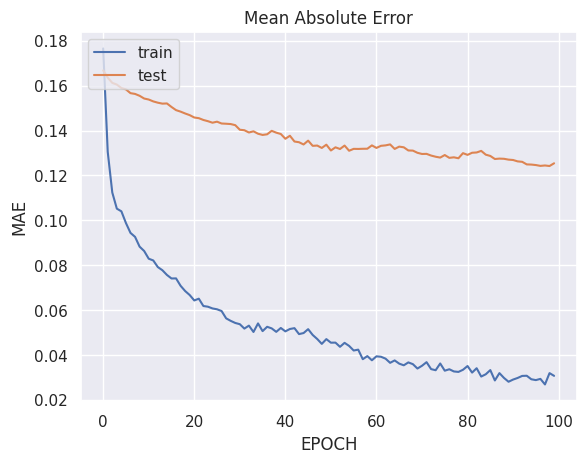

In [ ]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('EPOCH')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

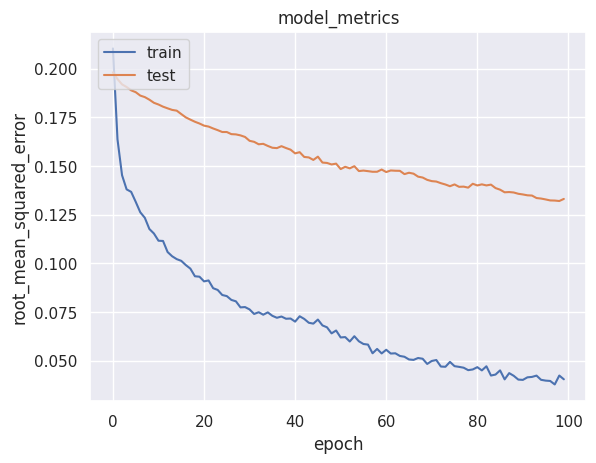

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Perhatikanlah, proses training model cukup smooth dan model konvergen pada epochs sekitar 100. Dari proses ini, kita memperoleh nilai error akhir sebesar sekitar 0.04 dan error pada data validasi sebesar 0.14. Nilai tersebut cukup bagus untuk sistem rekomendasi.

In [ ]:
place_df = data
df_test = df_rating.copy()

# Mengambil sample user
user_id = df_test.user_id.sample(1).iloc[0]
place_visited_by_user = df_test[df_test.user_id == user_id]

# Operator bitwise (~) untuk tempat yang diasumsikan belum dikunjungi
place_not_visited = data[~data['user_id'].isin(place_visited_by_user.place_id.values)]['user_id']
place_not_visited = list(
    set(place_not_visited)
    .intersection(set(place_to_place_encoded.keys()))
)

place_not_visited = [[place_to_place_encoded.get(x)] for x in place_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_visited), place_not_visited)
)

In [ ]:
ratings = model.predict(user_place_array).flatten()

top_ratings_indices = ratings.argsort()[-1:][::-1]
recommended_place_ids = [
    place_encoded_to_place.get(place_not_visited[x][0]) for x in top_ratings_indices
]

print('Rekomendasi Untuk Pengguna dengan ID: {}'.format(user_id))
print('===' * 15)
print('Tempat Ekowisata dengan rating tertinggi dari Pengguna')
print('----' * 14)

top_place_user = (
    place_visited_by_user.sort_values(
        by = 'user_rating',
        ascending=False
    )
    .head(5)
    .place_id.values
)

place_df_rows = place_df[place_df['user_id'].isin(top_place_user)]
for row in place_df_rows.itertuples():
    print(row.place_name, ':', row.category)

print('----' * 15)
print('Top 5 Rekomendasi Tempat Ekowisata')
print('----' * 15)

recommended_place = place_df[place_df['user_id'].isin(recommended_place_ids)]
for row in recommended_place.itertuples():
    print(row.place_name, ':', row.category)

5/5 [==============================] - 0s 2ms/step
Rekomendasi Untuk Pengguna dengan ID: 7
Tempat Ekowisata dengan rating tertinggi dari Pengguna
--------------------------------------------------------
Curug Bugbrug : Cagar Alam
Dusun Bambu : Taman Hiburan
Gunung Manglayang : Cagar Alam,Taman Nasional
Happyfarm Ciwidey : Cagar Alam
Orchid Forest Cikole : Cagar Alam,Taman Hiburan
Sanghyang Heuleut : Budaya,Cagar Alam
Selasar Sunaryo Art Space : Budaya,Taman Hiburan
Taman Hutan Raya Ir. H. Djuanda : Budaya,Taman Hiburan
Tebing Karaton : Budaya,Cagar Alam
Taman Wisata Alam Gunung Pancar : Cagar Alam
Pulau Bidadari : Bahari,Cagar Alam
Taman Nasional Meru Betiri : Budaya,Cagar Alam,Taman Nasional
Taman Nasional Tanjung Puting : Bahari,Cagar Alam,Taman Hiburan,Taman Nasional
Desa Wisata Nglinggo : Desa Wisata
Taman Nasional Way Kambas : Taman Nasional,Cagar Alam
Pulau Kanawa : Bahari,Cagar Alam
Taman Hutan Raya Bung Hatta : Cagar Alam,Taman Hiburan
Taman Hutan Raya Wan Abdul Rachman : Cagar

### Evaluation

Pada sistem rekomendasi *content-based filtering* (CBF), kita dapat melihat dari 3 kali percobaan dan dari 2 teknik, model sudah dapat merekomendasikan kategori dengan kesamaan yang benar. Perbandingan selanjutnya adalah lama eksekusi dalam satuan detik

In [41]:
import time

# Mulai menghitung waktu untuk get_recommendations
start_time = time.time()
get_recommendations('Desa Wisata Munduk')
cosine_time = time.time() - start_time

# Mulai menghitung waktu untuk recommend_places
start_time = time.time()
recommend_places('Desa Wisata Munduk', data_new)
jaccard_time = time.time() - start_time


# Data untuk dataframe
data_eval = {
    'Method': ['Cosine Similarity', 'Jaccard Similarity'],
    'Time (seconds)': [cosine_time, jaccard_time]
}

# Membuat dataframe
df_evaluate = pd.DataFrame(data_eval)

df_evaluate

,Method,Time (seconds)
0,Cosine Similarity,0.012577
1,Jaccard Similarity,0.004255


Pada sistem rekomendasi *Collaborative filtering* (CF) kita mendapatkan MAE sebesar 0.0306 pada data training dan 0.1254 pada data validasi, serta RMSE seebsar 0.0405 pada data training dan 0.1331 pada data uji. Hasil ini sudah cukup baik untuk sistem rekomendasi dan ketika diujicoba sudah memberikan rekomendasi dengan kesamaan preferensi pengguna sebelumnya

## Conclusion

Berdasarkan hasil yang didapatkan, maka dapat disimpulkan sebagai berikut:

* Metode *Content-based Filtering* dapat digunakan untuk membuat sistem rekomendasi tempat ekowisata. Pada pendekatan menggunakan cosine similarity dan jaccard similarity, model sudah dapat merekomendasikan tempat ekowisata berdasarkan kesamaan atau kemiripan kategori dengan benar

* Metode *Collaborative Filtering* dapat digunakan untuk membuat sistem rekomendasi tempat ekowisata yang belum pernah dikunjungi dan mungkin disukai oleh pengguna  berdasarkan preferensi pemberian rating tempat wisata di masa lalu oleh pengguna. Berdasarkan pendekatan yang dilakukan menggunakan RecommenderNet menunjukkan bahwa metode tersebut memiliki nilai *Mean Absolute Error* (MAE) yang relatif rendah pada data training sebesar 0.03 dan data validasi sebesar 0.12. Pada nilai *Root Mean Square Error* (RMSE) juga memiliki nilai relatif rendah yaitu data training sebesar 0.04 dan data validasi sebesar 0.13, sehingga dapat dikatakan model ini dalam merekemondasikan sudah cukup bagus.

Harapan ke depan model ini dapat digunakan dan diterapkan pada organisasi atau perusahaan berdasarkan demografi personal sehingga lebih mendekati personalisasi dan pengalaman pengguna yang baik. Selain itu model ini dapat dikembangkan lebih jauh menggunakan teknik *Hybrid Recommender System*.